In [28]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#importando o csv
df = pd.read_csv("nba.games.stats.csv")

In [30]:
df.drop(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent'], axis=1, inplace=True)
df.head()

,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,L,102,109,40,80,0.500,13,22,0.591,9,...,27,33,0.818,16,48,26,13,9,9,22
1,W,102,92,35,69,0.507,7,20,0.350,25,...,18,21,0.857,11,44,25,5,5,18,26
2,L,92,94,38,92,0.413,8,25,0.320,8,...,27,38,0.711,11,50,25,7,9,19,15
3,L,119,122,43,93,0.462,13,33,0.394,20,...,20,27,0.741,11,51,31,6,7,19,30
4,W,103,96,33,81,0.407,9,22,0.409,28,...,8,11,0.727,13,44,26,2,6,15,29


In [31]:
#Transformando os dados categóricos de  WINorLOSS para numeros
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['WINorLOSS'])
df['WINorLOSS'] = le.transform(df['WINorLOSS'])

In [32]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [33]:
#separando a base de dados
x = df.drop('WINorLOSS',axis=1)
x = x.fillna(x.mean())
y = df['WINorLOSS']
y = y.fillna(y.mean())

In [34]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [35]:
#importando o algoritmo de arvore de decisão
from sklearn.tree import DecisionTreeClassifier
arD = DecisionTreeClassifier()

In [36]:
arD.fit(x_treino,y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
predicao = arD.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

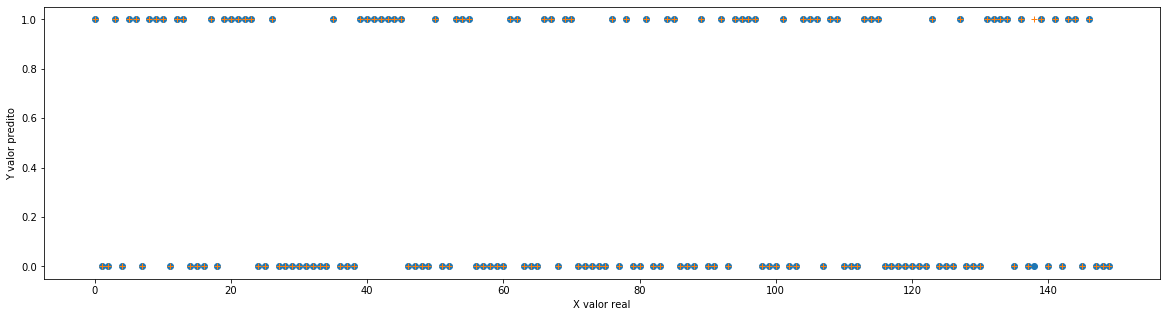

In [38]:
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [39]:
from sklearn import metrics
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 0.010501355013550135
MSE: 0.010501355013550135
RMSE: 0.10247611923541082


In [40]:
print('Variance score: %.2f' % arD.score(x_teste,aux))

Variance score: 0.99


In [41]:
#fazendo a predicao usando cross-valodation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(arD,x,y, cv=10)

In [42]:
print('Variance Cros-Validation rscore: %.2f' % max(scores))

Variance Cros-Validation rscore: 1.00


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predicao))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1476
           1       0.99      0.99      0.99      1476

    accuracy                           0.99      2952
   macro avg       0.99      0.99      0.99      2952
weighted avg       0.99      0.99      0.99      2952



In [44]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste,predicao))

[[1463   13]
 [  18 1458]]
